In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [3]:
name = 'Food'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2020-09-10")
x = df['Close']

In [4]:
returns = x.pct_change(1).dropna()

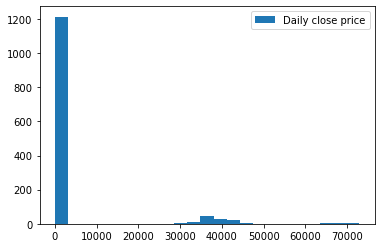

In [5]:
plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

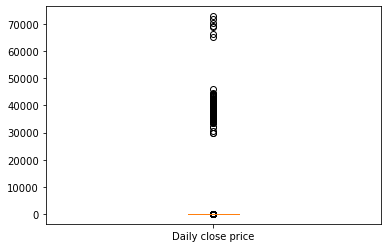

In [6]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

In [7]:
np.mean(returns)

3577.5357211346204

In [8]:
np.quantile(returns,0.5)

0.0

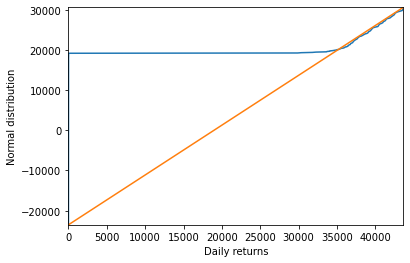

In [9]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

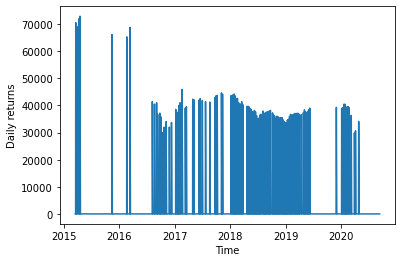

In [10]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

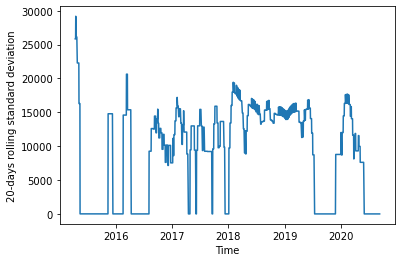

In [11]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()